salinity


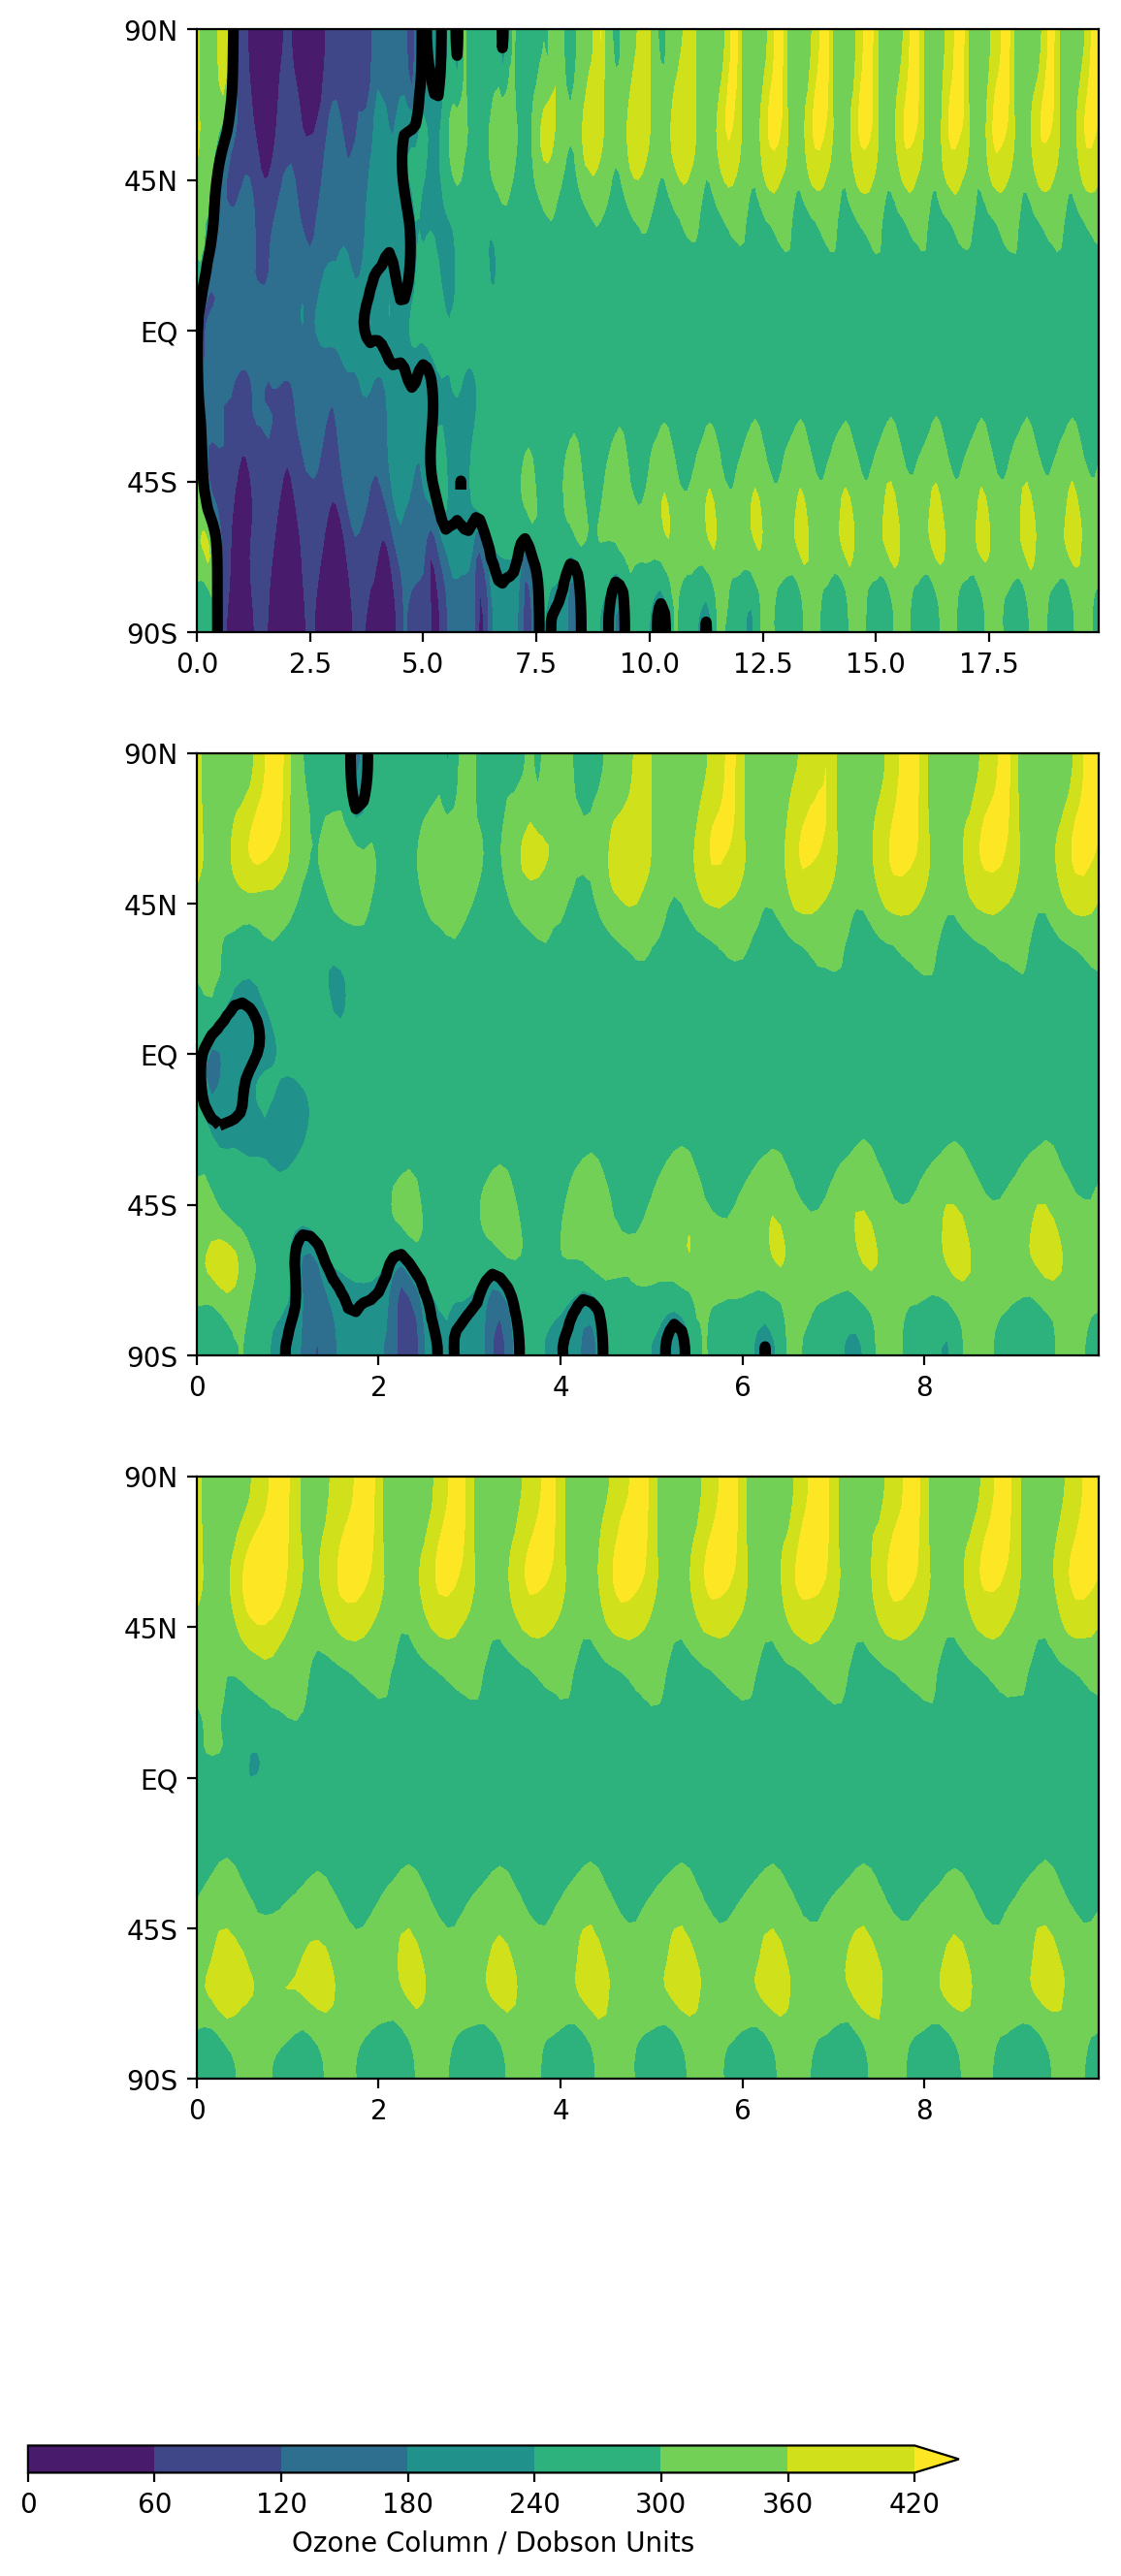

In [8]:
from netCDF4 import Dataset
from matplotlib import gridspec
# use modules
import sys as sys
sys.path.append('../python_modules/')
import numpy as np
import pylab as plt
import calendar as calendar
from gridbox_areas import gbox_areas
from plot_1D import *
import time
######################### Input ####################################
loc='/gws/nopw/j04/ukca_vol2/dcw32/'
jobids1=['xnofa','xnofb','xnofc','xnofd','xnofe','xnoff']
jobids2=['xnofg','xnofh','xnofi','xnofj','xnofk','xnofl']
jobids3=['xnofn','xnofo','xnofp','xnofq','xnofr','xnofs','xnoft','xnofu','xnofv','xnofw','xnofx','xnofy']
#jobids=['xnofg','xnofh','xnofi','xnofj','xnofk','xnofl']
var='salinity'
varn='samalas_ozone_col'
print (var)
# Plotting Arguments
#levs=[50,100,150,200,250,300,350,400,450,500]
#colmap='Spectral'
#cbar_label='Ozone Column / DU'
levs=[0,60,120,180,240,300,360,420]
outdir='./'
outname=varn+'_surftimese_plot'+time.strftime("%Y%m%d")
save=True
format='pdf'
extend='both'
mm1=240
mm2=120
mm3=120
#mm=240
####################################################################
#
# Extract
fig=plt.figure(figsize=(6,14), dpi=200)
gs1 = gridspec.GridSpec(3, 1)
gs1.update(wspace=0.0)
ax1 = plt.subplot(gs1[0,:])
ax2 = plt.subplot(gs1[1,0])
ax3 = plt.subplot(gs1[2,0])
def extract_col(axis,jobids,mm,l_right):
    njob=len(jobids)
    store1=np.zeros([njob,mm,73])
    for i in range(njob):
        file=Dataset(loc+jobids[i]+'/netcdf/'+jobids[i]+'_oz.nc')
        lats=file.variables['latitude'][:]
        lons=file.variables['longitude'][:]
        time=file.variables['t'][:]
        field=file.variables[var][:].squeeze()
        file.close()
        field=field[:,0,:,:]
        #TimexLat
        field=np.mean(field,axis=2)
        store1[i,:,:]=field
    time=time/360.
    time=time-time[0]
    store=np.mean(store1,axis=0)
    # Start Plotting
    cf1=axis.contourf(time,lats,np.transpose(store),levs,extend='max')
    axis.contour(time,lats,np.transpose(store),[220],colors='k',linewidths=4)
    axis.set_yticks([-90,-45,0,45,90])
    axis.set_yticklabels(['90S','45S','EQ','45N','90N'])
    if l_right==True:
        axis.yaxis.tick_right()
        axis.yaxis.set_ticks_position('both')
    return cf1
cf1=extract_col(ax1,jobids1,mm1,False)
# ax1.text(0.02,1.02,'A: HI-HAL',transform=ax1.transAxes\
#         ,verticalalignment='bottom',horizontalalignment='left'\
#         ,fontsize='14',color='k')
cf2=extract_col(ax2,jobids2,mm2,False)
# ax2.text(0.04,1.02,'B: LO-HAL',transform=ax2.transAxes\
#         ,verticalalignment='bottom',horizontalalignment='left'\
#         ,fontsize='14',color='k')
cf3=extract_col(ax3,jobids3,mm3,False)
# ax3.text(0.04,1.02,'C: BOTH-SO2',transform=ax3.transAxes\
#         ,verticalalignment='bottom',horizontalalignment='left'\
#         ,fontsize='14',color='k')
cbaxes=fig.add_axes([-0.02, -0.02, 0.8, 0.01])
cbar=plt.colorbar(cf3,cax=cbaxes,orientation="horizontal")
cbar.set_label('Ozone Column / Dobson Units')
cbaxes.yaxis.set_label_position('left')
# ax3.text(0.00,-0.12,'Years After Eruption',transform=ax3.transAxes\
#         ,verticalalignment='top',horizontalalignment='center'\
#         ,fontsize='12',color='k')
# if save==True:
#                 print ("SAVING "+outdir+outname+'.'+format)
#                 if not os.path.exists(outdir):
#                         os.makedirs(outdir)
#                 plt.savefig(outdir+outname+'.'+format,bbox_inches="tight")

plt.savefig(outdir+outname+'.svg')
plt.show()

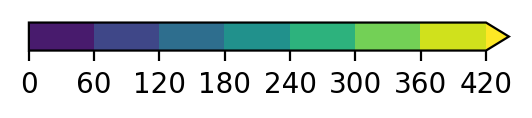

In [6]:
fig=plt.figure(figsize=(6,14), dpi=200)
cbaxes=fig.add_axes([-0.02, -0.02, 0.4, 0.01])
cbar=plt.colorbar(cf3,cax=cbaxes,orientation="horizontal")